In [561]:
#libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import seaborn as sns
print("libs downloaded")

libs downloaded


In [562]:
#define path
file_path = "C:/Users/tyler/OneDrive - SNHU/WGU/Machine Learning/Task2/churn_clean.csv"
df = pd.read_csv(file_path)
#check out data types and if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [563]:
#Internet service has null values
print(df['InternetService'].unique())

['Fiber Optic' 'DSL' nan]


In [564]:
nan_count = df['InternetService'].isna().sum()
print(nan_count)

2129


In [565]:
nan_rows = df[df['InternetService'].isna()]
print(nan_rows)

      CaseOrder Customer_id                           Interaction  \
5             6     W303516  2b451d12-6c2b-4cea-a295-ba1d6bced078   
15           16     A403906  df437bd4-bd8a-4c8f-8110-11ed1a7723ea   
17           18     F721878  5c3548de-4744-4167-9412-3f018262bab2   
18           19     F487435  200fad69-1e40-4de6-9222-df84d8925000   
24           25     U644626  30a2f575-54cc-4894-96b8-358317896f43   
...         ...         ...                                   ...   
9983       9984     F378234  b12db5e8-92fc-4114-ab6f-8643412600d7   
9984       9985     W838935  723e3f1a-0ceb-44c9-b4be-ce53b4c72564   
9987       9988     C454652  c4cb88a8-dd44-46a4-84e7-891edf25cbaf   
9989       9990     W719857  e8f40610-af75-4bfd-baf8-0b15918b04ed   
9993       9994     W608373  3f3c716b-fd57-40f2-8a58-d944efcf1fd5   

                                   UID           City State  \
5     97598fd95658c80500546bc1dd312994    Fort Valley    GA   
15    d43e8bc69c074903d9c618596562747e  Saint

In [566]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7871 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             7871 non-null   int64  
 1   Customer_id           7871 non-null   object 
 2   Interaction           7871 non-null   object 
 3   UID                   7871 non-null   object 
 4   City                  7871 non-null   object 
 5   State                 7871 non-null   object 
 6   County                7871 non-null   object 
 7   Zip                   7871 non-null   int64  
 8   Lat                   7871 non-null   float64
 9   Lng                   7871 non-null   float64
 10  Population            7871 non-null   int64  
 11  Area                  7871 non-null   object 
 12  TimeZone              7871 non-null   object 
 13  Job                   7871 non-null   object 
 14  Children              7871 non-null   int64  
 15  Age                   7871

In [567]:
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'Zip', 'Lat',
              'Lng', 'City', 'State', 'TimeZone', 'County'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7871 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            7871 non-null   int64  
 1   Area                  7871 non-null   object 
 2   Job                   7871 non-null   object 
 3   Children              7871 non-null   int64  
 4   Age                   7871 non-null   int64  
 5   Income                7871 non-null   float64
 6   Marital               7871 non-null   object 
 7   Gender                7871 non-null   object 
 8   Churn                 7871 non-null   object 
 9   Outage_sec_perweek    7871 non-null   float64
 10  Email                 7871 non-null   int64  
 11  Contacts              7871 non-null   int64  
 12  Yearly_equip_failure  7871 non-null   int64  
 13  Techie                7871 non-null   object 
 14  Contract              7871 non-null   object 
 15  Port_modem            7871

In [568]:
#set ordinal
ordinal_features = ['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
#seperate out continuous variables for standardization
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns
#remove ordinal columns from continuous selection
continuous_features = [feature for feature in continuous_features if feature not in ordinal_features]

In [569]:
#binary encoding fr yes and no
binary_features = ['Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                   'StreamingMovies', 'PaperlessBilling']
for feature in binary_features:
    df[feature] = df[feature].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
#using it as a boolean as deprecation of .replace with change in the future.
print("binaries encoded")

binaries encoded


In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7871 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            7871 non-null   int64  
 1   Area                  7871 non-null   object 
 2   Job                   7871 non-null   object 
 3   Children              7871 non-null   int64  
 4   Age                   7871 non-null   int64  
 5   Income                7871 non-null   float64
 6   Marital               7871 non-null   object 
 7   Gender                7871 non-null   object 
 8   Churn                 7871 non-null   int64  
 9   Outage_sec_perweek    7871 non-null   float64
 10  Email                 7871 non-null   int64  
 11  Contacts              7871 non-null   int64  
 12  Yearly_equip_failure  7871 non-null   int64  
 13  Techie                7871 non-null   int64  
 14  Contract              7871 non-null   object 
 15  Port_modem            7871

In [571]:
#One Hot Encoding for the nominal variables
df = pd.get_dummies(df, columns=['Gender', 'Marital', 'Job', 
                                 'Area', 'Contract', 'InternetService',
                                 'PaymentMethod'], drop_first=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7871 entries, 0 to 9999
Columns: 684 entries, Population to PaymentMethod_Mailed Check
dtypes: bool(652), float64(5), int64(27)
memory usage: 6.9 MB


In [572]:
#True and Flase needs to be encoded
df = df.map(lambda x: 1 if x is True else (0 if x is False else x))
df.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,...,Job_Writer,Job_Youth worker,Area_Suburban,Area_Urban,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,38,0,68,28561.99,0,7.978323,10,0,1,0,...,0,0,0,1,1,0,1,1,0,0
1,10446,1,27,21704.77,1,11.699080,12,0,1,1,...,0,0,0,1,0,0,1,0,0,0
2,3735,4,50,9609.57,0,10.752800,9,0,1,1,...,0,0,0,1,0,1,0,1,0,0
3,13863,1,48,18925.23,0,14.913540,15,2,0,1,...,0,0,1,0,0,1,0,0,0,1
4,11352,0,83,40074.19,1,8.147417,16,2,1,0,...,0,0,1,0,0,0,1,0,0,1


In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7871 entries, 0 to 9999
Columns: 684 entries, Population to PaymentMethod_Mailed Check
dtypes: float64(5), int64(679)
memory usage: 41.1 MB


In [574]:
#ensure everything is numeric format for the proper modeling
numeric_columns = df.select_dtypes(include=['number'])
if len(numeric_columns.columns) == len(df.columns):
    print("All columns are numeric.")
else:
    print("Not all columns are numeric.")

All columns are numeric.


In [575]:
df.to_csv("C:/Users/tyler/OneDrive - SNHU/WGU/Machine Learning/Task2/Msmit_cleaned_dataset.csv", index=False)
print('complete')

complete


In [576]:
#STANDARDIZATION
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])
print("Standardization Complete")

Standardization Complete


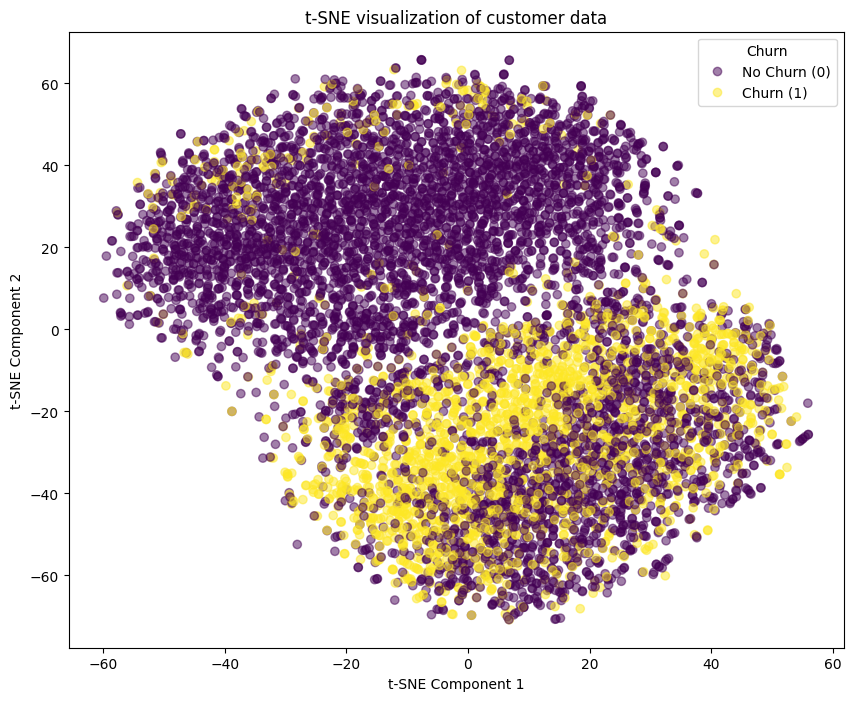

In [577]:
#Feature and targets
x = df.drop('Churn', axis=1) 
y = df['Churn'] 
## Set up t-SNE with desired parameters
tsne = TSNE(n_components=2, random_state=42)

# Apply t-SNE to your data
tsne_results = tsne.fit_transform(x)

# Visualize the results (2D plot) showing Churn as color
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('t-SNE visualization of customer data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['No Churn (0)', 'Churn (1)'], title="Churn")
# Show the plot
plt.show()

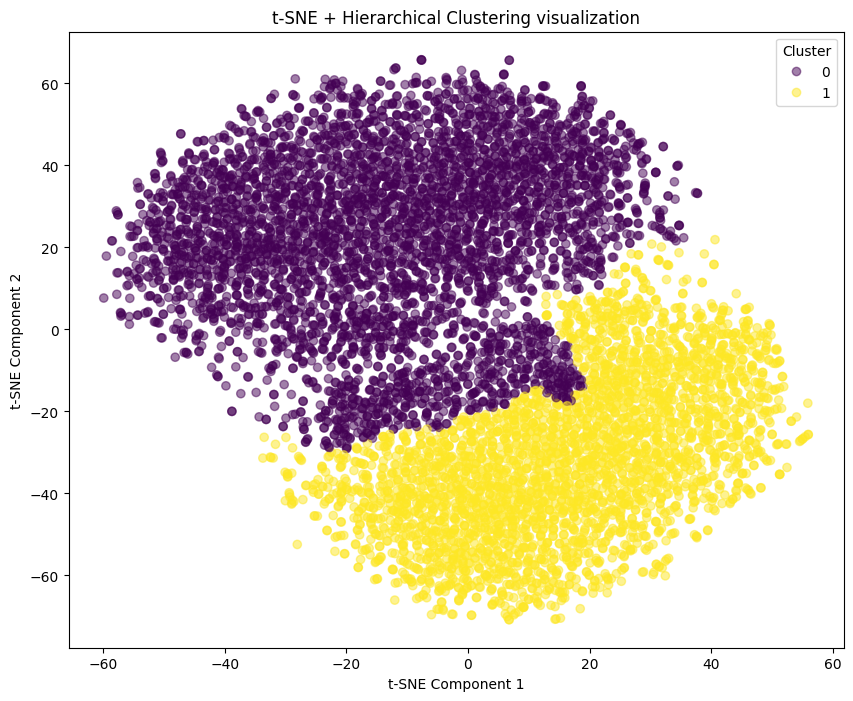

In [578]:
#Apply Agglomerative Clustering
clusterer = AgglomerativeClustering(n_clusters=2)
cluster_labels = clusterer.fit_predict(tsne_results)  # Apply clustering on the t-SNE output

#Visualize the t-SNE results with cluster labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE + Hierarchical Clustering visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Cluster")
plt.show()

In [579]:
df['cluster'] = cluster_labels
df['Churn'] = y

#Calculate churn rate within each cluster
cluster_churn_rate = df.groupby('cluster')['Churn'].mean()
print(cluster_churn_rate)

cluster
0    0.133362
1    0.469835
Name: Churn, dtype: float64


In [580]:
#Hierarchical clustering using Ward's method
Z = linkage(df, method='ward') 
print("Ward complete")

Ward complete


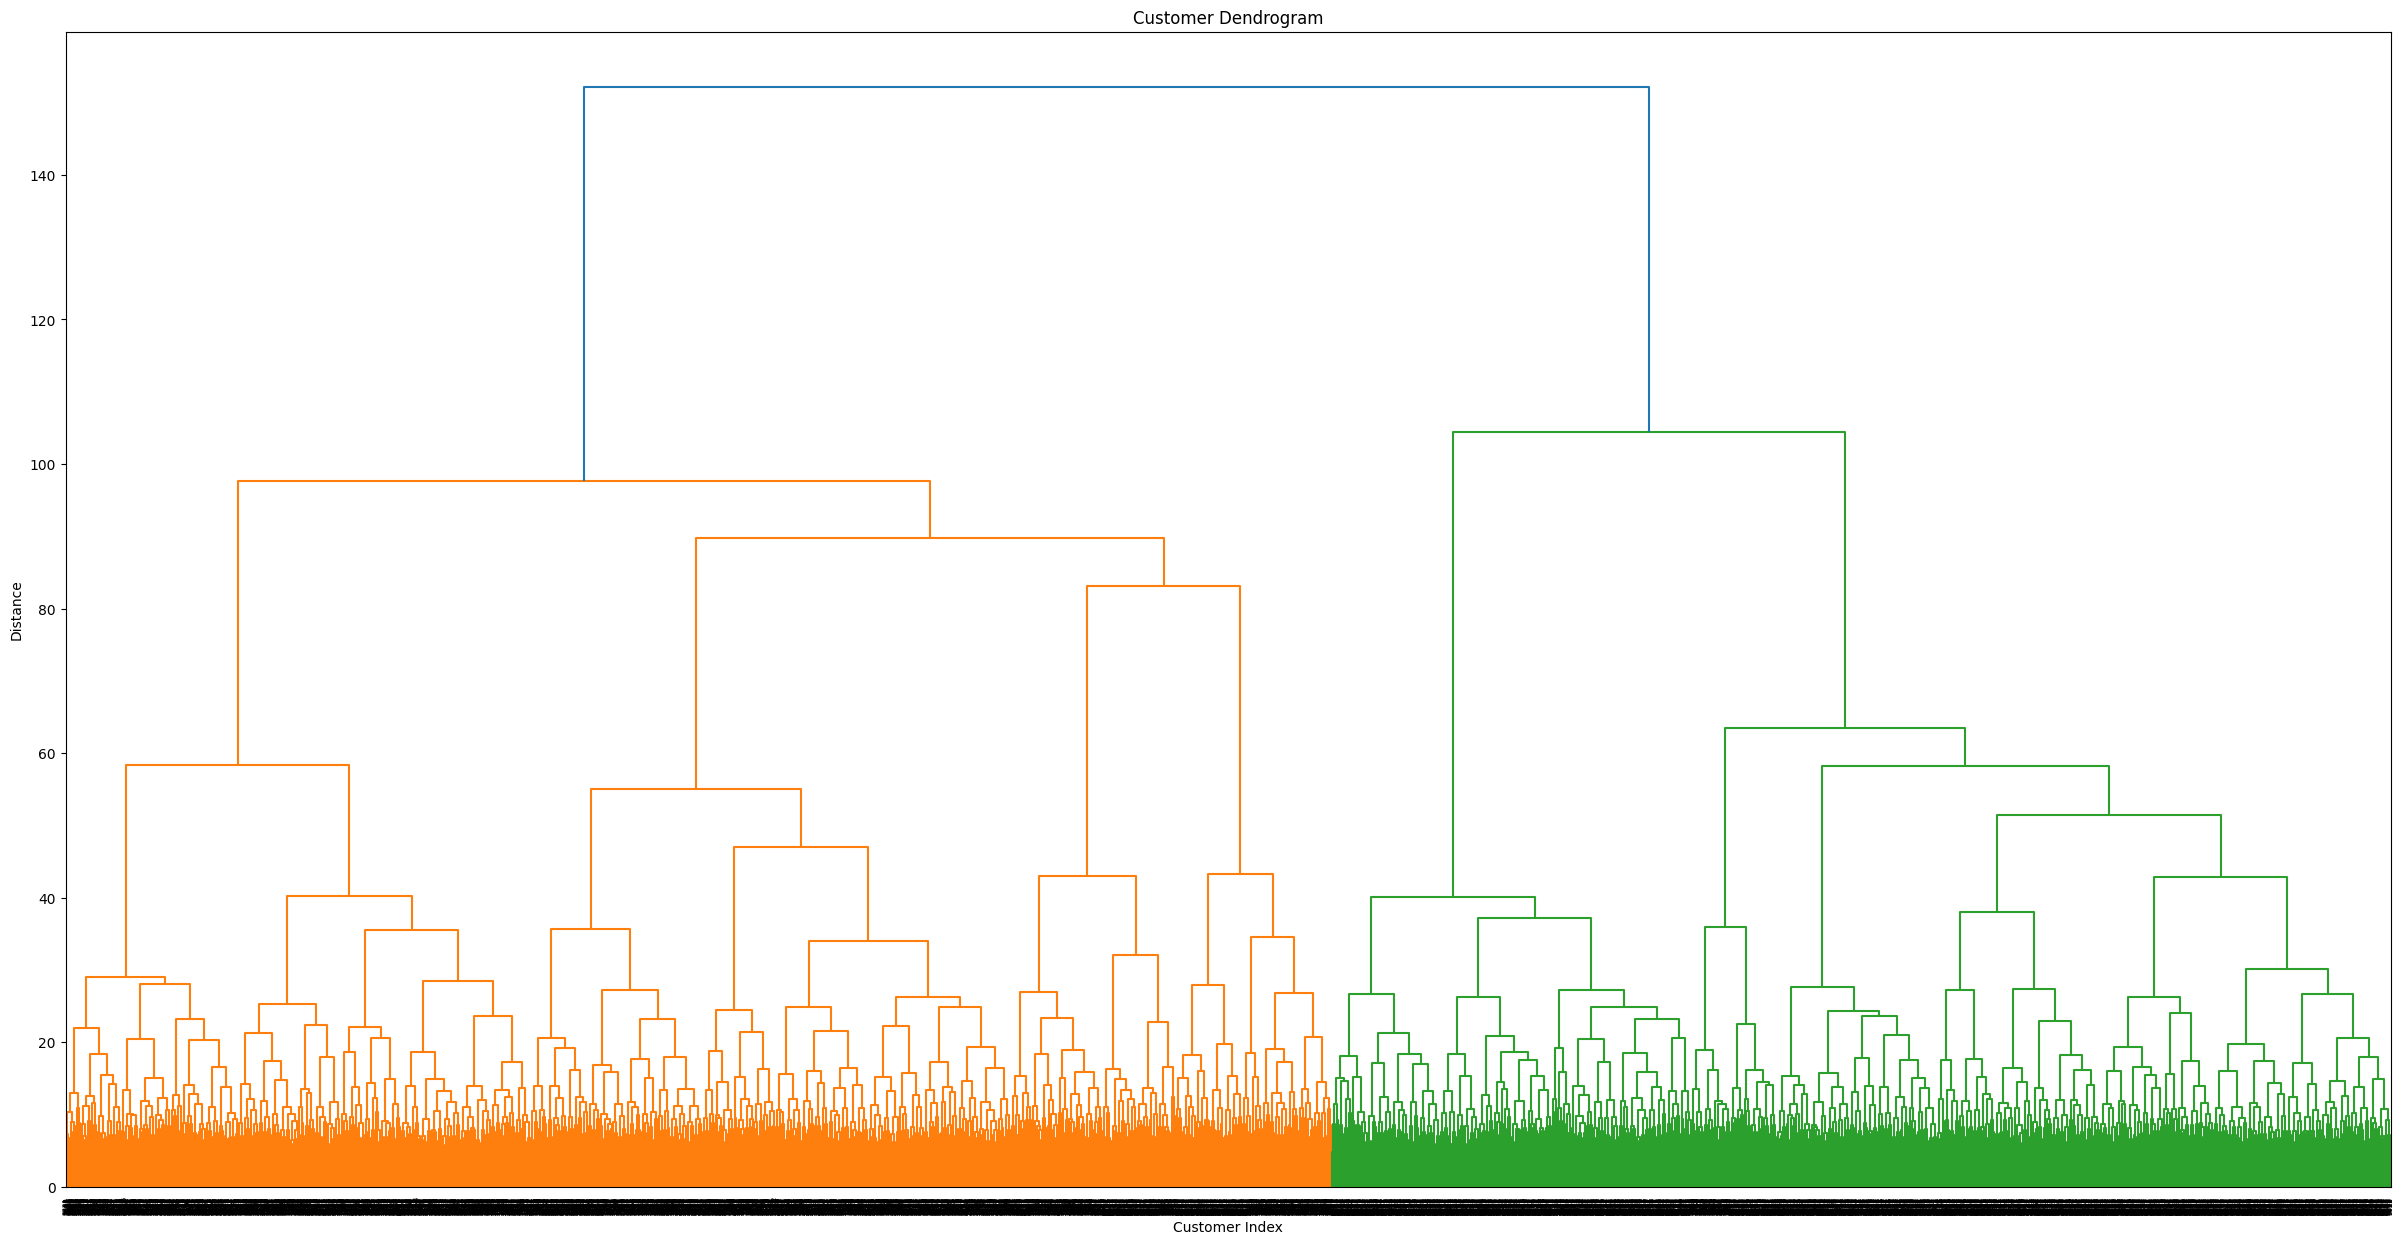

In [581]:
#DENDROGRAM
plt.figure(figsize=(30, 15))
dendrogram(Z)
plt.title("Customer Dendrogram")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.show()

In [582]:
#cut the denogram
max_d=120
# Assign cluster labels to each point based on the cut
cluster_labels = fcluster(Z, max_d, criterion='distance')

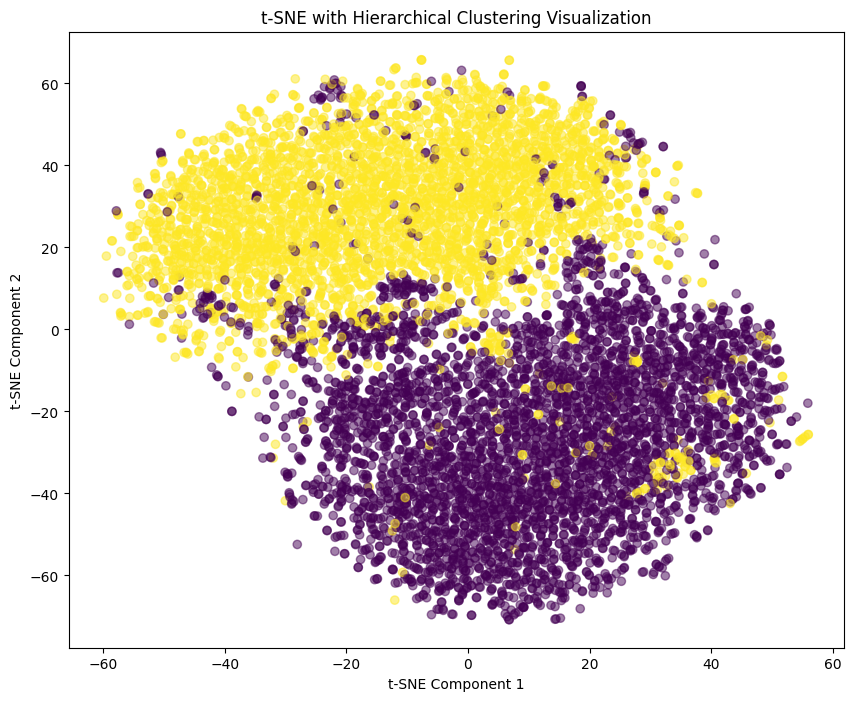

In [583]:
# Add the cluster labels to the dataframe
df['Cluster'] = cluster_labels

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('t-SNE with Hierarchical Clustering Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.show()

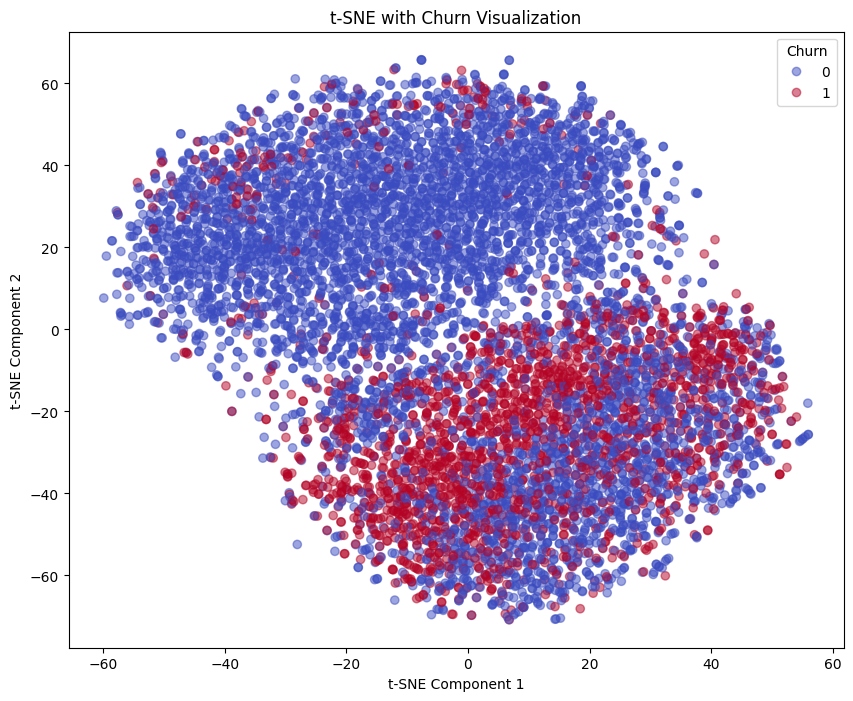

In [584]:
# Visualizing using t-SNE with Churn as color
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['Churn'], cmap='coolwarm', alpha=0.5)
plt.title('t-SNE with Churn Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Churn")
plt.show()

In [585]:
df.groupby('Cluster')['Churn'].mean()

Cluster
1    0.441231
2    0.073123
Name: Churn, dtype: float64

In [586]:
# Calculate the mean of each feature for each cluster
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

         Population  Children       Age    Income     Churn  \
Cluster                                                       
1          0.135044  0.126467 -0.053400 -0.072635  0.441231   
2         -0.161616 -0.151351  0.063907  0.086927  0.073123   

         Outage_sec_perweek     Email  Contacts  Yearly_equip_failure  \
Cluster                                                                 
1                 -0.007849  0.020761 -0.023781             -0.010271   
2                  0.009393 -0.024846  0.028460              0.012292   

           Techie  ...  Job_Youth worker  Area_Suburban  Area_Urban  \
Cluster            ...                                                
1        0.178172  ...          0.000933       0.334188    0.340718   
2        0.157968  ...          0.001116       0.335473    0.322635   

         Contract_One year  Contract_Two Year  InternetService_Fiber Optic  \
Cluster                                                                      
1            

In [587]:
# Calculate correlation with Churn
cluster_1_df = df[df['Cluster'] == 1]
correlation_matrix = cluster_1_df.drop(columns=['cluster']).corr()
# Get the top 10 features most correlated with Churn
top_10_correlation = correlation_matrix['Churn'].sort_values(ascending=False).head(10)
print(top_10_correlation)

Churn                          1.000000
MonthlyCharge                  0.474384
StreamingMovies                0.389168
StreamingTV                    0.294161
Multiple                       0.162713
Techie                         0.077203
OnlineBackup                   0.064386
DeviceProtection               0.059981
Job_Chief Marketing Officer    0.042125
Age                            0.041974
Name: Churn, dtype: float64


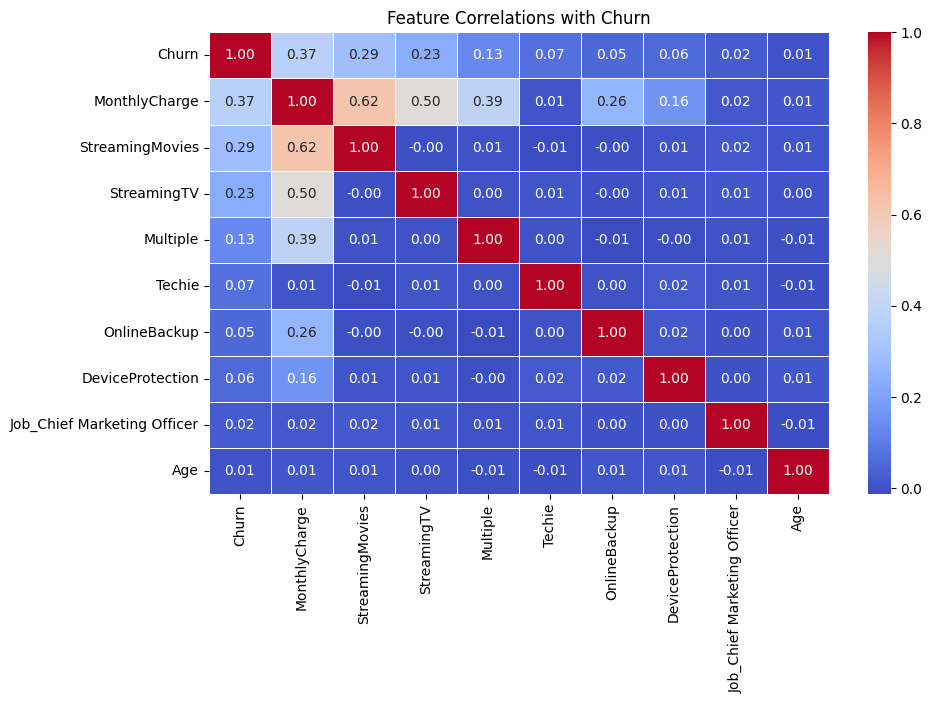

In [588]:
# Create a correlation matrix of relevant features
correlation_matrix = df[['Churn', 'MonthlyCharge', 'StreamingMovies', 'StreamingTV', 'Multiple', 
                         'Techie', 'OnlineBackup', 'DeviceProtection', 'Job_Chief Marketing Officer', 'Age']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlations with Churn')
plt.show()